<a href="https://colab.research.google.com/github/YuliiaPantana/PRA3024/blob/master/Copy_of_LHCb_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
!pip install uproot awkward lz4 xxhash
import uproot
f=uproot.open ("/content/drive/MyDrive/B2HHH_MagnetDown(5).root")
f.keys()
f["DecayTree"].show()
f["DecayTree/H1_PX"].array()
f["DecayTree/H1_PX"].array(library="pd")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | d

0           375.284205
1         -4985.130785
2         -1265.456544
3          -720.797259
4           397.754571
              ...     
5135818    2606.910839
5135819    2606.910839
5135820    2606.910839
5135821    -294.710989
5135822     499.042349
Length: 5135823, dtype: float64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import math

In [157]:
#Here the data for PX, PY, PZ from DecayTree will be copied to local arrays; this is done with purpose to reduce time of future operations
H1_Px_array = f["DecayTree/H1_PX"].array()
H1_Py_array = f["DecayTree/H1_PY"].array()
H1_Pz_array = f["DecayTree/H1_PZ"].array()
H2_Px_array = f["DecayTree/H2_PX"].array()
H2_Py_array = f["DecayTree/H2_PY"].array()
H2_Pz_array = f["DecayTree/H2_PZ"].array()
H3_Px_array = f["DecayTree/H3_PX"].array()
H3_Py_array = f["DecayTree/H3_PY"].array()
H3_Pz_array = f["DecayTree/H3_PZ"].array()
     


In [158]:
#Here the calculations for plotting the Total momentum of each of the three daughters will be made
H1_Ptot_array = []
H2_Ptot_array = []
H3_Ptot_array = []
for i in range (0, 5000): 
  #Here the total momentum will be found through computing the lenth of the vetor P_tot by knowing its components PX, PY, PZ
  H1_Ptot = pow((pow(H1_Px_array[i], 2) + pow(H1_Py_array[i], 2) + pow(H1_Pz_array[i], 2)), 0.5)
  H1_Ptot_array.append(H1_Ptot)
  H2_Ptot = pow((pow(H2_Px_array[i], 2) + pow(H2_Py_array[i], 2) + pow(H2_Pz_array[i], 2)), 0.5)
  H2_Ptot_array.append(H2_Ptot)
  H3_Ptot = pow((pow(H3_Px_array[i], 2) + pow(H3_Py_array[i], 2) + pow(H3_Pz_array[i], 2)), 0.5)
  H3_Ptot_array.append(H3_Ptot)


Text(0, 0.5, 'The Number of Particles')

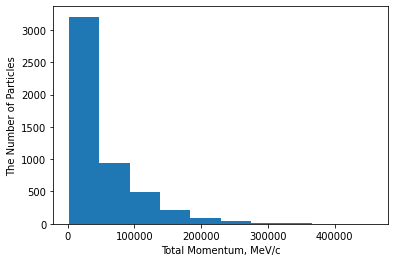

In [163]:
#Here the total Momentum for H1 particle will be plotted
plt.hist(H1_Ptot_array)
plt.xlabel("Total Momentum, MeV/c")
plt.ylabel("The Number of Particles")

Text(0.5, 0, 'Total Momentum, MeV/c')

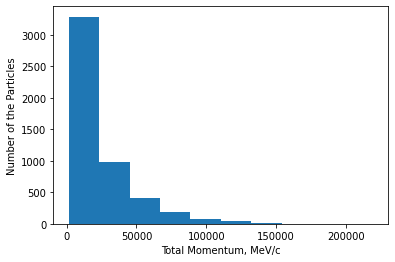

In [164]:
#Here the total Momentum for H2 particle will be plotted
plt.hist(H2_Ptot_array)
plt.ylabel("Number of the Particles")
plt.xlabel("Total Momentum, MeV/c")

Text(0.5, 0, 'Total Momentum, MeV/c')

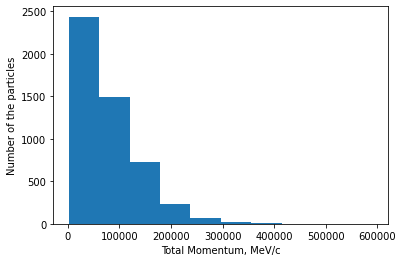

In [165]:
#Here the total Momentum for H3 particle will be plotted
plt.hist(H3_Ptot_array)
plt.ylabel("Number of the particles")
plt.xlabel("Total Momentum, MeV/c")

Text(0.5, 0, 'Total Momentum, MeV/c')

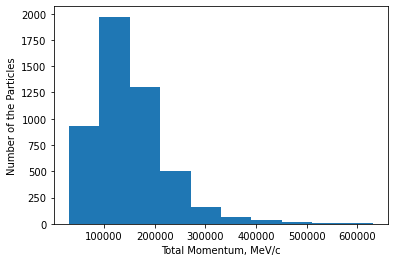

In [166]:
#Here momentum of the mother will be calculated and plotted
M_Ptot_array = []
for i in range (0, 5000):
  #Here the M_Ptot will by found based on momentum conservation principle applied to states before and after the decay
  #The components of M_Ptot were found as sum of components of daughter particles momentum, then the M_Ptot was computed in similar way as P_tot for H1, H2, H3
  M_Ptot = pow(pow((H1_Px_array[i] + H2_Px_array[i] + H3_Px_array[i]),2) + pow((H1_Py_array[i] + H2_Py_array[i] + H3_Py_array[i]),2) + pow((H1_Pz_array[i] + H2_Pz_array[i] + H3_Pz_array[i]), 2), 0.5)
  M_Ptot_array.append(M_Ptot)
plt.hist(M_Ptot_array)
plt.ylabel("Number of the Particles")
plt.xlabel("Total Momentum, MeV/c")

In [ ]:
tree.Show(45) #did not work 

In [167]:
#Here the data for ProbK, ProbPi, H_isMuon from DecayTree will be copied to local arrays; this is done with purpose to reduce time of future operations
H1_ProbK_array = f["DecayTree/H1_ProbK"].array()
H2_ProbK_array = f["DecayTree/H2_ProbK"].array()
H3_ProbK_array = f["DecayTree/H3_ProbK"].array()
H1_ProbPi_array = f["DecayTree/H1_ProbPi"].array()
H2_ProbPi_array = f["DecayTree/H2_ProbPi"].array()
H3_ProbPi_array = f["DecayTree/H3_ProbPi"].array()
H1_isMuon_array = f["DecayTree/H1_isMuon"].array()
H2_isMuon_array = f["DecayTree/H2_isMuon"].array()
H3_isMuon_array = f["DecayTree/H3_isMuon"].array()
H1_Charge_array = f["DecayTree/H1_Charge"].array()
H2_Charge_array = f["DecayTree/H2_Charge"].array()
H3_Charge_array = f["DecayTree/H3_Charge"].array()
   

Text(0.5, 0, 'Mass, MeV/c^2')

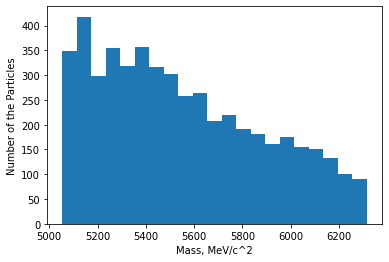

In [168]:
#Here the histogram of the range of masses of the B meson will be plotted
M_M_array = []
for i in range (0, 5000):
  #The data will not be filtered, here it is approximated that each set of corresponding daughter particles corresponds to the meson mother particle
        #The principle of mass computation will be based on Relativistic Energy-Momentum Relation (E^2 = P^2*C^2 + M^2*C^2), where in natural units 'C' scales to 1.
        #The energy of mother particle will be found through energy conservation principle and momentum conservation principle applied to states of the particles before and after the decay
        #The values of masses of particles were taken as masses of Kaons, which were taken from the internet in MeV/c^2 units
        H1_E = math.sqrt((H1_Ptot_array[i]**2) + (497.6)**2) 
        H2_E = math.sqrt((H2_Ptot_array[i]**2) + (497.6)**2)
        H3_E = math.sqrt((H3_Ptot_array[i]**2) + (497.6)**2)
        M_E = H1_E +  H2_E + H3_E
        M_M = math.sqrt((M_E**2 - (M_Ptot_array[i])**2))
        M_M_array.append(M_M)

#Here the histogram of mass ranges of the B meson will be plot
plt.hist(M_M_array, bins = 'auto')
plt.ylabel("Number of the Particles")
plt.xlabel("Mass, MeV/c^2")
         

#Does this match what we would expect from theory?
# --- From this histogram it can be observed that the value for mass varies significantly, this means that there were different particles in experiment, and approximation that all particles were the daughter particles of meson was not reasonable. 

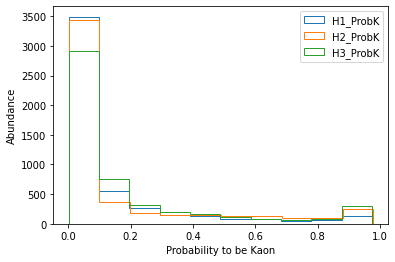

In [169]:
#Here histograms H1/H2/H3 _ProbK will be plotted
f["DecayTree/H1_ProbK"].array() 
f["DecayTree/H2_ProbK"].array()
f["DecayTree/H3_ProbK"].array()
plt.hist(f["DecayTree/H1_ProbK"].array()[0: 5000], label='H1_ProbK', histtype = 'step')
plt.hist(f["DecayTree/H2_ProbK"].array()[0: 5000], label='H2_ProbK', histtype = 'step')
plt.hist(f["DecayTree/H3_ProbK"].array()[0: 5000], label='H3_ProbK', histtype = 'step')
plt.ylabel("Abundance")
plt.xlabel("Probability to be Kaon")
ax = plt.subplot()
leg=ax.legend();

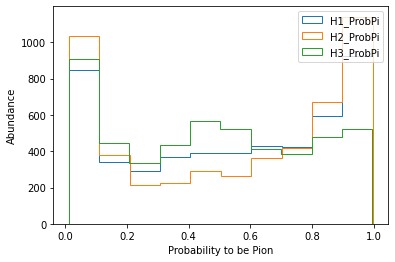

In [170]:
#Here histograms of H1/H2/H3 _ProbPi will be plotted
f["DecayTree/H1_ProbPi"].array() 
f["DecayTree/H2_ProbPi"].array()
f["DecayTree/H3_ProbPi"].array()
plt.hist(f["DecayTree/H1_ProbPi"].array()[0: 5000], label='H1_ProbPi', histtype = 'step')
plt.hist(f["DecayTree/H2_ProbPi"].array()[0: 5000], label='H2_ProbPi', histtype = 'step')
plt.hist(f["DecayTree/H3_ProbPi"].array()[0: 5000], label='H3_ProbPi', histtype = 'step')
plt.xlabel("Probability to be Pion")
plt.ylabel("Abundance")
ax = plt.subplot()
leg=ax.legend();

Text(0.5, 0, 'B_VertexChi2')

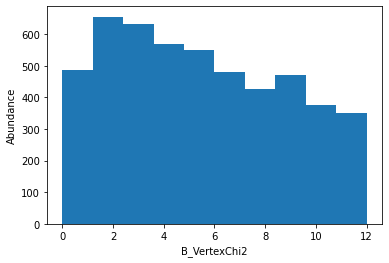

In [171]:
#Here the B_VertexChi2 will be plotted
f["DecayTree/B_VertexChi2"].array()
plt.hist(f["DecayTree/B_VertexChi2"].array()[0: 5000])
plt.ylabel("Abundance")
plt.xlabel("B_VertexChi2")

Text(0, 0.5, 'Proportion of the whole number of Particles')

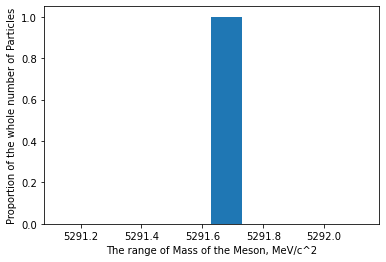

In [172]:
#Since in this code uproot was used there was no tree name defined as well as model did not have CutTree and raleted attributes, selection was made by for cycles as well as condition selections
M_M_filtered_array = []
for i in range (0, 5000):
  #here mesons will be filtered from any other particles, the mass of mesons will be collected into M_M_filtered_array
  #this condition checkes if all three daughter particles are Kaons; a particle is cosnisdered to be a Kaon if the corresponding probability is more than 0.9, probability of being Pion is less than 0.5 and probaility of being muon is zero
  if (H1_ProbK_array[i] > 0.9) and (H2_ProbK_array[i] > 0.9) and (H3_ProbK_array[i] > 0.9) and (H1_isMuon_array[i]==0 and H2_isMuon_array[i]==0 and H3_isMuon_array[i]==0) and ((H1_ProbPi_array[i] < 0.5) and (H2_ProbPi_array[i] < 0.5) and (H3_ProbPi_array[i] < 0.5)):
        H1_E = math.sqrt((H1_Ptot_array[i]**2) + (497.6)**2) 
        H2_E = math.sqrt((H2_Ptot_array[i]**2) + (497.6)**2)
        H3_E = math.sqrt((H3_Ptot_array[i]**2) + (497.6)**2)
        M_E = H1_E +  H2_E + H3_E
        M_M_filtered = math.sqrt((M_E**2 - (M_Ptot_array[i])**2))
        M_M_filtered_array.append(M_M_filtered)
plt.hist(M_M_filtered_array)
plt.xlabel("The range of Mass of the Meson, MeV/c^2")
plt.ylabel("Proportion of the whole number of Particles")


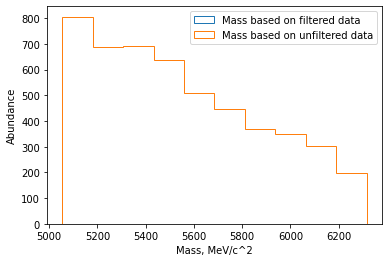

In [173]:
#Here the B meson mass from both the M_M_array and M_M_filtered_array will be plotted on one histogram
plt.hist(M_M_filtered_array, label='Mass based on filtered data', histtype='step')
plt.hist(M_M_array, label='Mass based on unfiltered data', histtype='step')
plt.xlabel("Mass, MeV/c^2")
plt.ylabel("Abundance")
ax = plt.subplot()
leg=ax.legend();
#What do you notice about your histogram now?
#From histogram it can be seen that the variability of filtered mass is negligible when comparing it to variability of unfiltered mass data 

In [175]:
#Here the number of particles and antiparticles will be counted 
N_B_Positive = 0
N_B_Negative = 0
for i in range (0, 110000):
  #here mesons will be filtered from any other particles, the mass of mesons will be collected into M_M_filtered_array
  #this condition filteres M_M_array to M_M_filtered_array
  if (H1_ProbK_array[i] > 0.9) and (H2_ProbK_array[i] > 0.9) and (H3_ProbK_array[i] > 0.9) and (H1_isMuon_array[i]==0 and H2_isMuon_array[i]==0 and H3_isMuon_array[i]==0) and ((H1_ProbPi_array[i] < 0.5) and (H2_ProbPi_array[i] < 0.5) and (H3_ProbPi_array[i] < 0.5)):
    #this condition filteres out particles B+, by checking that one and only one particle of three has a charge '-1'
         if (H1_Charge_array[i] == -1)^(H2_Charge_array[i] == -1)^(H3_Charge_array[i] ==-1):
             N_B_Positive = N_B_Positive + 1 
    #this condition filteres out particles B+, by checking that one and only one particle of three has a charge '-1'
         if (H1_Charge_array[i] == 1)^(H2_Charge_array[i] == 1)^(H3_Charge_array[i] == 1):
             N_B_Negative = N_B_Negative + 1
        
#Here the assymetry will be calculated
A = (N_B_Negative - N_B_Positive)/(N_B_Negative + N_B_Positive)
print(A)
#Here the uncertanty 'd' of this result will be calculated:
d = math.sqrt((1 - A**2)/(N_B_Negative + N_B_Positive)) 
print(d)
#From calculations it can be seen that for this set of data there are more matter than antimatter

-0.03225806451612903
0.17951183061683934
